# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

The data in the sat scores file describes the overall student participation rate as well as score averages for the math and verbal sections of the SAT exam, organized by the state in which the exam was taken.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

Given the assumption that the SAT exam is applied across a large population of students, additional statistical information (median and mode) would provide a more descriptive picture of the academic perfomance that is supposed to be indicated by the SAT exam. Additionally, scores may vary according to school district, but that would take the data detail to a level of granularity that exceeds the purpose of this exercise. 

##### 3. Create a description for each of the columns in the dataset.

The state column contains a list of all states that participate in SAT testing. The 'Rate' contains a percentage of students that take the exam versus the total population of the student population per state. The 'Math' column contains the average score on the Math section of the SAT exam for each state. The 'Verbal' column contains the average score on the Verbal section of the SAT exam for each state.  

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [1]:
# Import data from CSV into a list


# Initialize list
data = []

# Import pre-defined file for this exercise. As the data is CSV, each line will be split according
# to the comma delimiter and stored as separate list items.
with open('./data/sat_scores.csv','rU') as f:
    for ii, line in enumerate(f):
        data.append(line.strip().split(','))


##### 5. Print the data

In [2]:
# Print the contents of the list variable 'data'
print data

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [3]:
# Get the contents of the row that contains the labels
labels = data[0]

# Given the assumption that the row with labels will be the first row, remove the first row from the list
data = data[1:]

# Given the assumption that the last row will be a row with overall data and not relevant to the statistical
# analysis, remove the last row from the list
data = data[:-1]

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [4]:
# Get the position of the State name in the array of labels
state_info_position = labels.index("State")


# Initialise a new list to store State information
list_of_states = []


# Iterate through the modified data to extract a list of states
# This is done by referencing the data at the index position obtained above
for entry in data:
    list_of_states.append([entry[state_info_position]])

##### 8. Print the types of each column

In [5]:
# Print the type of each column

for label in labels:
    print type(label)

<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [6]:
# The label types are all string, but we know that some of the columns are of type integer. 
# This operation iterates through the list and converts anything not in the first column, which
# is known to contain the names of the states therefore need to remain of type string.

for dataline in data:
    dataline[1:] = [int(x) for x in dataline[1:]]

print data

[['CT', 82, 509, 510], ['NJ', 81, 499, 513], ['MA', 79, 511, 515], ['NY', 77, 495, 505], ['NH', 72, 520, 516], ['RI', 71, 501, 499], ['PA', 71, 500, 499], ['VT', 69, 511, 506], ['ME', 69, 506, 500], ['VA', 68, 510, 501], ['DE', 67, 501, 499], ['MD', 65, 508, 510], ['NC', 65, 493, 499], ['GA', 63, 491, 489], ['IN', 60, 499, 501], ['SC', 57, 486, 488], ['DC', 56, 482, 474], ['OR', 55, 526, 526], ['FL', 54, 498, 499], ['WA', 53, 527, 527], ['TX', 53, 493, 499], ['HI', 52, 485, 515], ['AK', 51, 514, 510], ['CA', 51, 498, 517], ['AZ', 34, 523, 525], ['NV', 33, 509, 515], ['CO', 31, 539, 542], ['OH', 26, 534, 439], ['MT', 23, 539, 539], ['WV', 18, 527, 512], ['ID', 17, 543, 542], ['TN', 13, 562, 553], ['NM', 13, 551, 542], ['IL', 12, 576, 589], ['KY', 12, 550, 550], ['WY', 11, 547, 545], ['MI', 11, 561, 572], ['MN', 9, 580, 589], ['KS', 9, 577, 580], ['AL', 9, 559, 554], ['NE', 8, 562, 568], ['OK', 8, 567, 561], ['MO', 8, 577, 577], ['LA', 7, 564, 562], ['WI', 6, 584, 596], ['AR', 6, 562, 55

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [7]:
# It is understood that there should be three different dictionaries (rate, verbal, math)
# with the state and the state's corresponding value for that dictionary.

# Initialize dictinoaries for each column
rate_state_values = {}
math_state_values = {}
verbal_state_values = {}

# Iterate through the modified data, insert the corresponding values at the known data positions given 
# the assumed index positions for each data column. 
for state in data:
    rate_state_values.update({state[state_info_position]:state[1]})
    math_state_values.update({state[state_info_position]:state[2]})
    verbal_state_values.update({state[state_info_position]:state[3]})


##### 11. Create a dictionary with the values for each of the numeric columns

In [8]:
# obtain index position for each column
math_data_position = labels.index("Math")
verbal_data_position = labels.index("Verbal")
rate_data_position = labels.index("Rate")

# initialize dictionary with three keys, integer based lists for each key
test_stats = {'Math':[],'Verbal':[],'Rate':[]}

# Iterate through the modified data and insert corresponding values to each dictionary based on the
# the data obtained at list position defined above
for state in data:
    test_stats['Math'].append(state[math_data_position])
    test_stats['Verbal'].append(state[verbal_data_position])
    test_stats['Rate'].append(state[rate_data_position])

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [146]:
# Perform operation of list values for each dictionary keys
for stat_type in list(test_stats.keys()):
    print "Max " + str(stat_type) + " : " + str(max(test_stats[stat_type]))
    print "Min " + str(stat_type) + " : " + str(min(test_stats[stat_type]))
    

Max Rate : 82
Min Rate : 4
Max Verbal : 593
Min Verbal : 482
Max Math : 603
Min Math : 439


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [147]:
# Function to find the Population Standard Deviation of a provided list of numbers

# Standard Deviation calculator function. 
# As this function was designed to operate only on type list variables, the function will quit with an error
# if the passed variable is not of type list
def find_std_dev(stat_data):
    if type(stat_data)!=list: 
        print "This function was designed to work on a list, but the data provided does not appear to be a list."
    else:
        std_dev=(sum((x-(float(sum(stat_data))/len(stat_data)))**2 for x in stat_data)/len(stat_data))**0.5
        return std_dev
        
# Calculate the standard deviation of each column
for stat_type in list(test_stats.keys()):
    print "Standard Deviation of " + str(stat_type) + ": " + str(find_std_dev(test_stats[stat_type]))

Standard Deviation of Rate: 27.2792386761
Standard Deviation of Verbal: 33.0319826842
Standard Deviation of Math: 35.9298731731


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

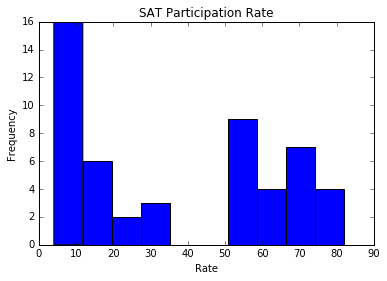

In [178]:
# Required line for matplotlib to function in Jupyter
%matplotlib inline

# Import required libraries for these next few exercises
import matplotlib.pyplot as dv

# NOTE : It is known that the pandas library can be used, if not preferrably, to perform the next few exercises.
#        It is also known that pandas is built upon matplotlib for it's functionality. However, as the exercise
#        specifically calls for use of matplotlib and pyplot, pandas we not used to generate the graphs below.

dv.hist(test_stats['Rate'])
dv.title("SAT Participation Rate")
dv.xlabel("Rate")
dv.ylabel("Frequency")
dv.show()

##### 15. Plot the Math distribution

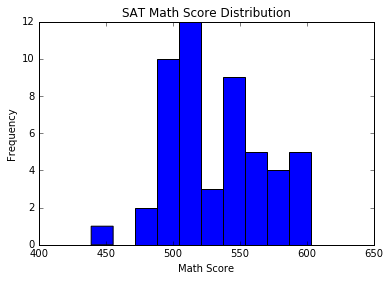

In [181]:
dv.hist(test_stats['Math'])
dv.title("SAT Math Score Distribution")
dv.xlabel("Math Score")
dv.ylabel("Frequency")
dv.show()

##### 16. Plot the Verbal distribution

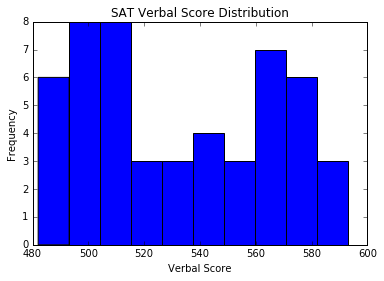

In [180]:
dv.hist(test_stats['Verbal'])
dv.title("SAT Verbal Score Distribution")
dv.xlabel("Verbal Score")
dv.ylabel("Frequency")
dv.show()

##### 17. What is the typical assumption for data distribution?

The typical assumption for data distribution would be that the data would be distribution would resemble a normal curve.

##### 18. Does that distribution hold true for our data?

The distribution for the participation rate and verbal scores are not in line with the typical assumption for data distribution. The distribution for math scores however somewhat resembles what would be considered a normal curve. 

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

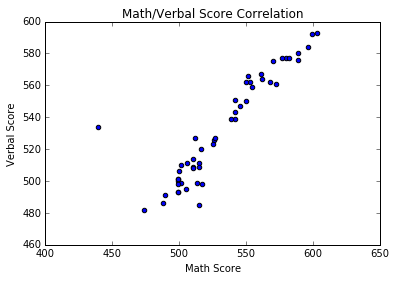

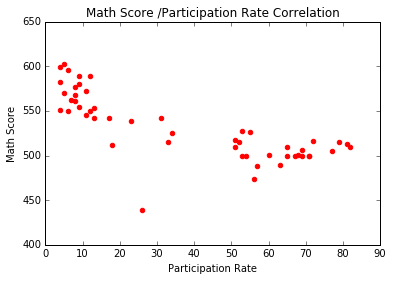

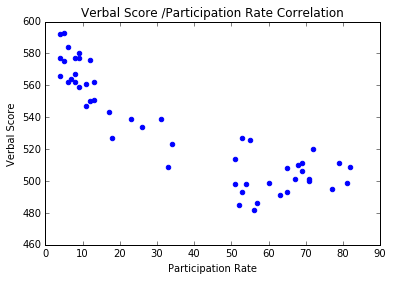

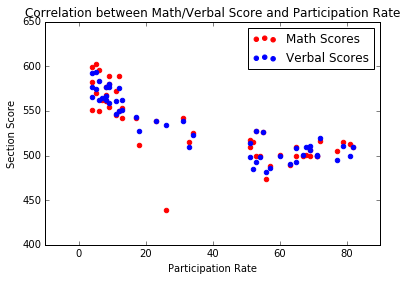

In [167]:
dv.scatter(test_stats['Math'],test_stats['Verbal'])
dv.title("Math/Verbal Score Correlation")
dv.xlabel("Math Score")
dv.ylabel("Verbal Score")
dv.show()

dv.scatter(test_stats['Rate'],test_stats['Math'],color='red')
dv.title("Math Score /Participation Rate Correlation")
dv.xlabel("Participation Rate")
dv.ylabel("Math Score")
dv.show()

dv.scatter(test_stats['Rate'],test_stats['Verbal'],color='blue')
dv.title("Verbal Score /Participation Rate Correlation")
dv.xlabel("Participation Rate")
dv.ylabel("Verbal Score")
dv.show()

dv.scatter(test_stats['Rate'],test_stats['Math'],color='red', label='Math Scores')
dv.scatter(test_stats['Rate'],test_stats['Verbal'],color='blue', label='Verbal Scores')
dv.title("Correlation between Math/Verbal Score and Participation Rate")
dv.xlabel("Participation Rate")
dv.ylabel("Section Score")
dv.legend()
dv.show()

##### 20. Are there any interesting relationships to note?

Participation rates and average math/verbal scores initally appear to be inversely correlated according to geographic region, with midwestern states generally appearing to score higher on average on both math and verbal sections. However, the low participation rates of these regions results in low confidence that the data is truly representative of the general population in these areas. 

##### 21. Create box plots for each variable. 

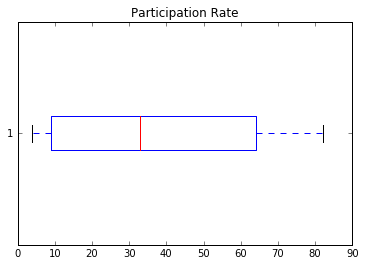

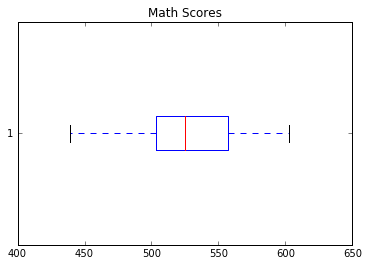

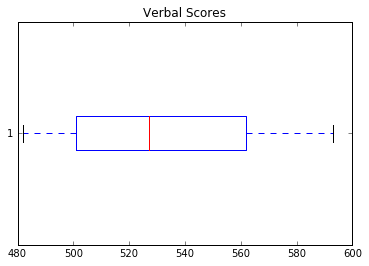

In [137]:
dv.boxplot(test_stats['Rate'], 0, 'rs', 0)
dv.title("Participation Rate")
dv.show()

dv.boxplot(test_stats['Math'], 0, 'rs', 0)
dv.title("Math Scores")
dv.show()

dv.boxplot(test_stats['Verbal'], 0, 'rs', 0)
dv.title("Verbal Scores")
dv.show()

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

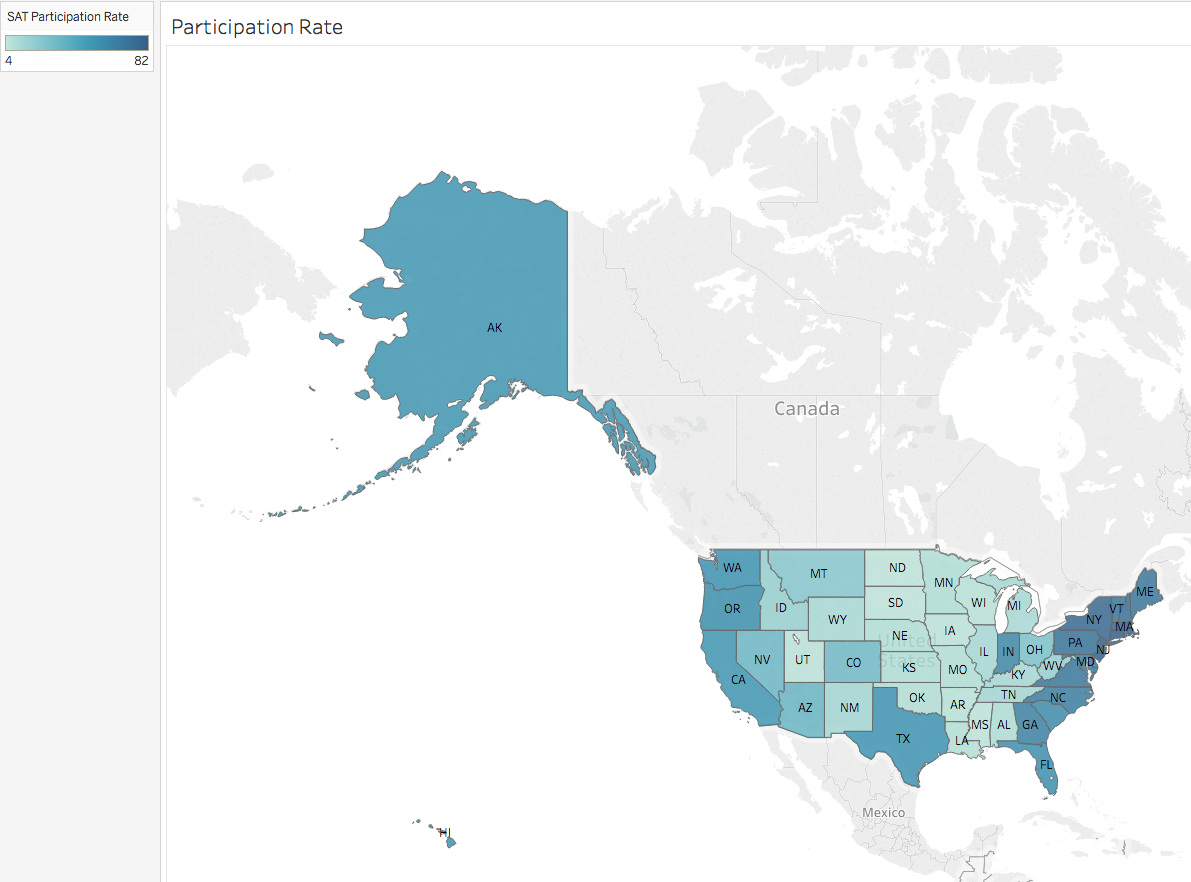

In [161]:
from IPython.display import Image
Image("./assets/rate.png")

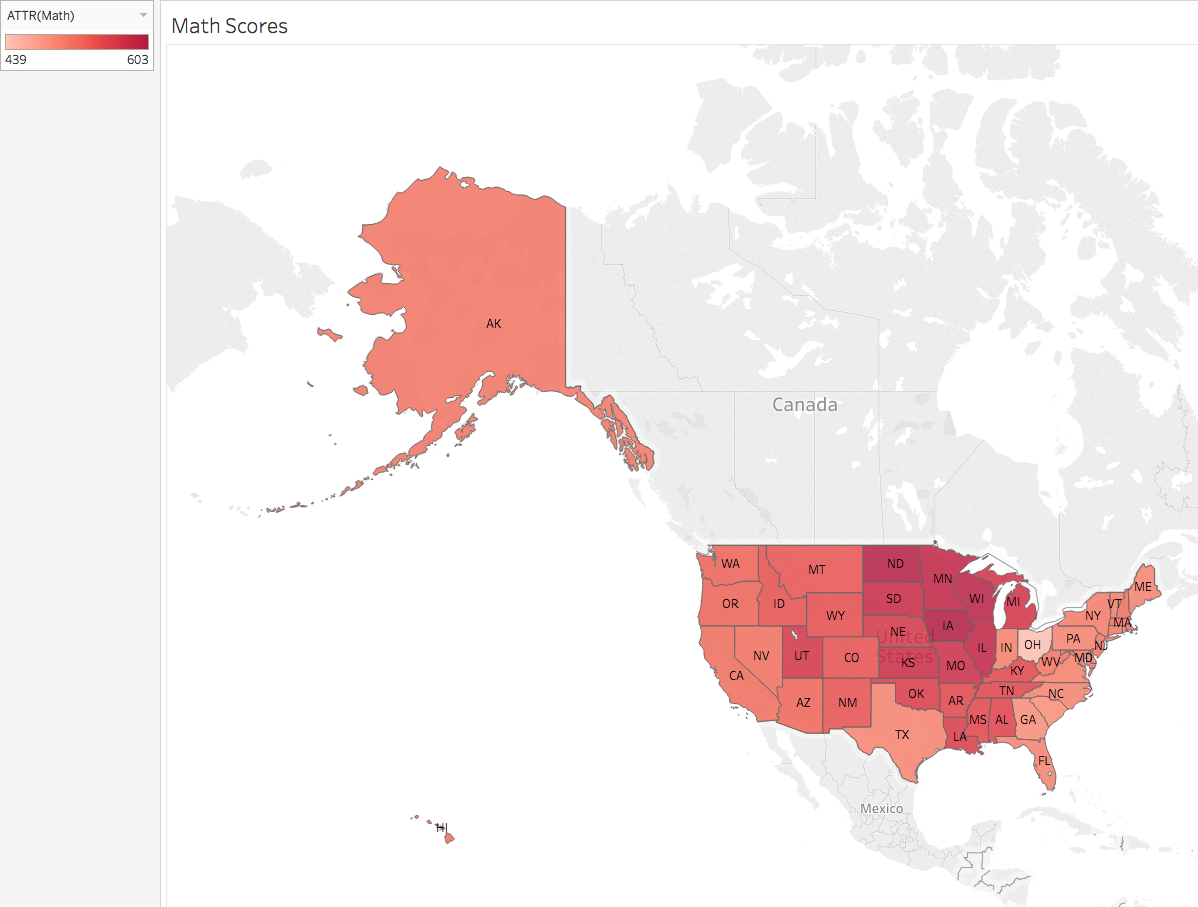

In [162]:
from IPython.display import Image
Image("./assets/math.png")

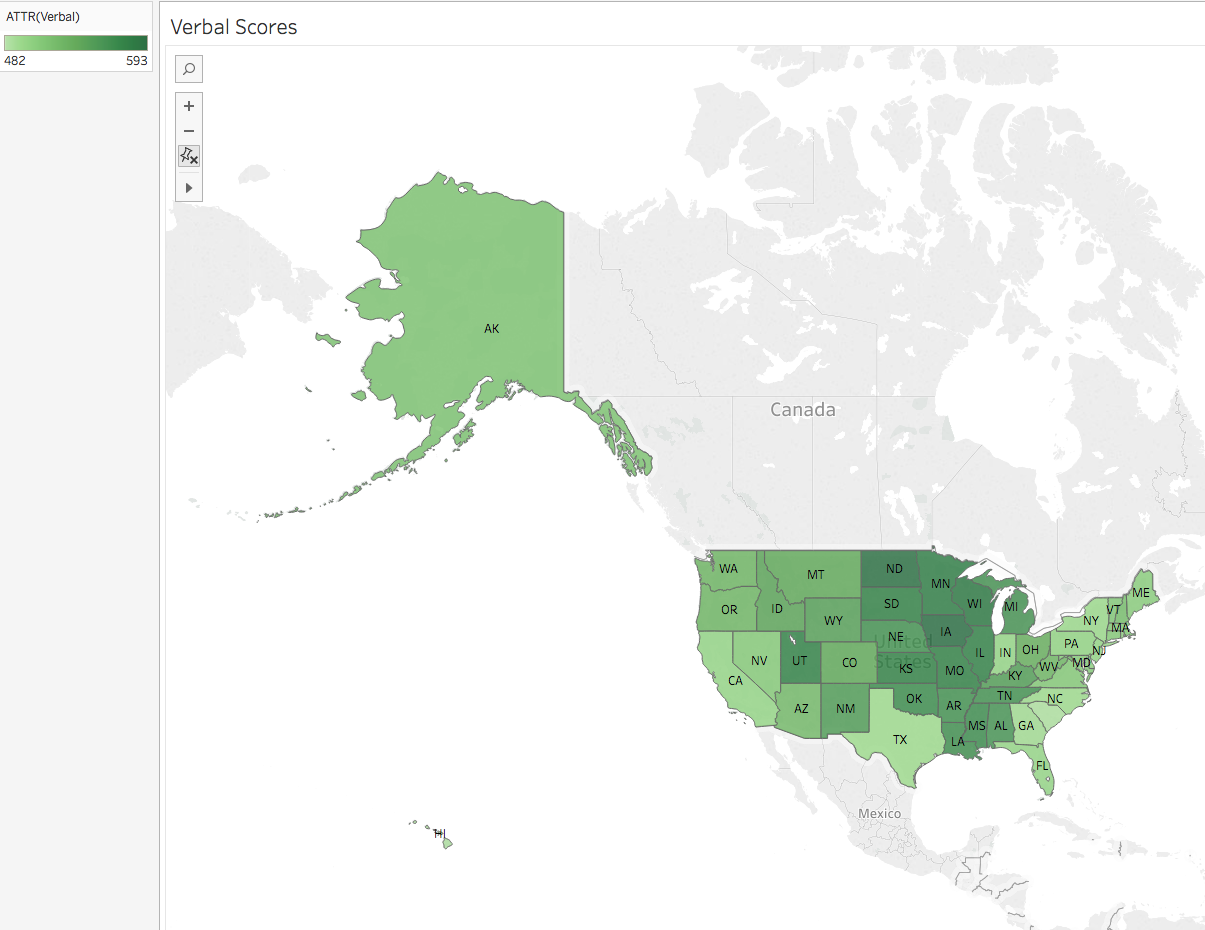

In [163]:
from IPython.display import Image
Image("./assets/verbal.png")